In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('line.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 1.67)

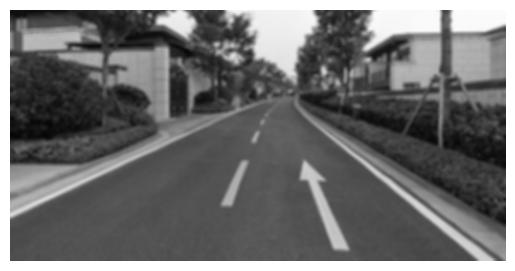

In [3]:
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

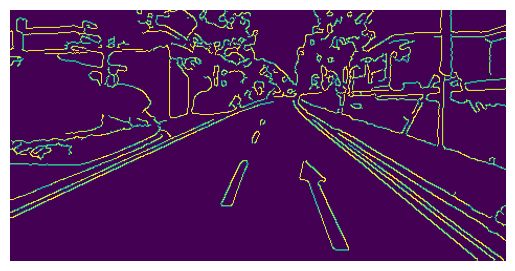

In [4]:
edges = cv2.Canny(blur, 50, 150)
plt.imshow(edges)
plt.axis('off')
plt.show()

In [5]:
# 保留下面50%的区域
height, width = edges.shape
mask = np.zeros_like(edges)
polygon = np.array([[
    (0, height),
    (width, height),
    (width, int(height * 0.5)),
    (0, int(height * 0.5)),
]], np.int32)
cv2.fillPoly(mask, polygon, 255)
masked_edges = cv2.bitwise_and(edges, mask)

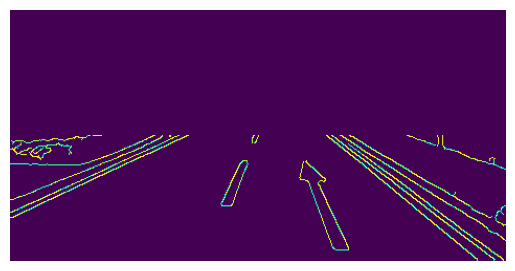

In [6]:
plt.imshow(masked_edges)
plt.axis('off')
plt.show()

In [7]:
# 霍夫变换
lines = cv2.HoughLinesP(masked_edges, 1, np.pi / 180, threshold=150, minLineLength=100, maxLineGap=50)



In [8]:
print(lines.shape)
print(lines)

(2, 1, 4)
[[[  0 198 168 120]]

 [[315 120 470 217]]]


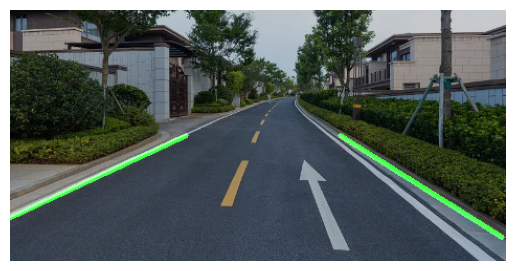

In [9]:
# 画出线段
line_image = np.zeros_like(image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# 合并到图像上
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

plt.imshow(cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [42]:

def my_hough(edges, rho, theta, threshold):
    height, width = edges.shape
    cos_theta = np.cos(np.arange(0, np.pi, theta))
    sin_theta = np.sin(np.arange(0, np.pi, theta))

    # 初始化霍夫空间
    num_rhos = int(np.sqrt(height**2 + width**2)) * 2
    accumulator = np.zeros((num_rhos, int(np.pi / theta)))
    
    y_idxs, x_idxs = np.nonzero(edges)
    
    #对于边缘上的每一个点
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        
        # 遍历角度范围
        for t in range(0, int(np.pi / theta)):
            # ρ = x * cos(θ) + y * sin(θ)
            rho_val = int(x * cos_theta[t] + y * sin_theta[t])
            accumulator[rho_val, t] += 1
    print(accumulator.shape)
    plt.imshow(accumulator)
    plt.axis('off')
    plt.show()
    
    lines = []
    vertical_flag=0
    # 获得一些峰值
    for rho in range(accumulator.shape[0]):
        for theta in range(accumulator.shape[1]):
            if accumulator[rho, theta] >= threshold:
                lines.append((rho,theta))
    return lines

(1062, 180)


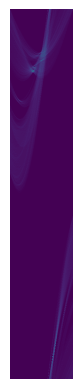

In [43]:
my_lines=my_hough(masked_edges,1,np.pi / 180,threshold=150)

In [44]:
print(my_lines)

[(970, 127), (974, 127)]


974 127
2.2165681500327987
0.7986355100472927
-0.6018150231520484
-1618 0
-1617 1
-1615 2
-1614 3
-1613 4
-1611 5
-1610 6
-1609 7
-1607 8
-1606 9
-1605 10
-1603 11
-1602 12
-1601 13
-1599 14
-1598 15
-1597 16
-1595 17
-1594 18
-1593 19
-1591 20
-1590 21
-1589 22
-1587 23
-1586 24
-1585 25
-1583 26
-1582 27
-1581 28
-1579 29
-1578 30
-1577 31
-1575 32
-1574 33
-1573 34
-1571 35
-1570 36
-1569 37
-1568 38
-1566 39
-1565 40
-1564 41
-1562 42
-1561 43
-1560 44
-1558 45
-1557 46
-1556 47
-1554 48
-1553 49
-1552 50
-1550 51
-1549 52
-1548 53
-1546 54
-1545 55
-1544 56
-1542 57
-1541 58
-1540 59
-1538 60
-1537 61
-1536 62
-1534 63
-1533 64
-1532 65
-1530 66
-1529 67
-1528 68
-1526 69
-1525 70
-1524 71
-1522 72
-1521 73
-1520 74
-1518 75
-1517 76
-1516 77
-1514 78
-1513 79
-1512 80
-1510 81
-1509 82
-1508 83
-1506 84
-1505 85
-1504 86
-1502 87
-1501 88
-1500 89
-1499 90
-1497 91
-1496 92
-1495 93
-1493 94
-1492 95
-1491 96
-1489 97
-1488 98
-1487 99
-1485 100
-1484 101
-1483 102
-1481 103
-148

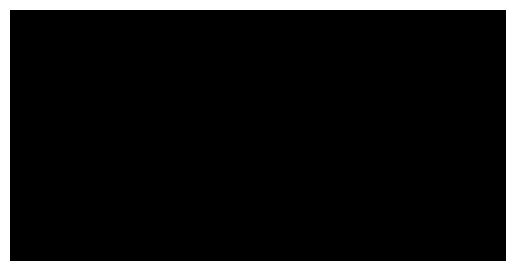

In [58]:
line_image = np.zeros_like(image)
if my_lines is not None:
    for rho, theta in my_lines:
        if(rho==974):
            print(rho,theta)
            theta = np.pi * theta / 180
            print(theta)
            print(np.sin(theta))
            print(np.cos(theta))
            for y in range(image.shape[1]):
                try:
                    x = int((rho - y * np.sin(theta))/np.cos(theta))
                    print(x,y)
                    if 0 <= x < image.shape[1]:
                        line_image[y, x] = 255
                except:
                    pass

plt.imshow(line_image)
plt.axis('off')
plt.show()

In [33]:
print(line_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
# 合并到图像上
my_combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

plt.imshow(cv2.cvtColor(my_combo_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()